<a href="https://colab.research.google.com/github/TeAmP0is0N/Fake-News-Hindi/blob/master/Models/Fake_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import pickle
import copy
import re
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.options.display.max_colwidth = 0

In [ ]:
#Loading Embedding Features DataFrame

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_train.pkl"
f = open(path_temp,'rb')
mbert_train = pickle.load(f)
f.close()

path_temp = r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Data Set/Embeddings Datasets/Multi-Lingual-BERT/mbert_test.pkl"
f = open(path_temp,'rb')
mbert_test = pickle.load(f)
f.close()


In [ ]:
mbert_train = mbert_train.rename(columns={'Defmatation':'Defamation'})
mbert_test = mbert_test.rename(columns={'Defmatation':'Defamation'})

In [ ]:
mbert_test = copy.deepcopy(mbert_train.iloc[5728:])
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
5728,0.146154,0.547867,0.063385,0.704434,0.324381,0.833834,-0.404689,0.602847,0.199473,0.629237,-0.006619,-0.769648,-0.609856,-0.194881,0.641315,-0.377627,-0.484244,-0.457588,-0.041876,-0.494019,-0.176284,0.133694,-0.437161,-0.569604,0.752515,0.278638,-0.179575,0.390398,0.661422,0.454654,-0.225835,-0.433343,-0.269566,-0.264891,0.322374,-0.032127,0.594944,0.576833,-0.206191,-0.276645,...,0.763836,-0.031216,0.360816,-0.740703,0.121272,0.164624,-0.469453,-0.289827,-0.197744,-0.000304,-0.157638,-0.005018,0.114211,1.116369,-0.436943,-0.135787,-0.049272,0.462445,-0.194197,-0.000036,0.470343,-0.504394,0.145645,-0.124713,0.549788,0.157939,-0.634953,0.087418,0.018456,0.132502,0.290918,0.026339,-0.303839,-0.383785,0,0,0,0,0,1
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5730,0.230976,0.036649,-0.075142,-0.065840,0.146906,0.516475,-0.021493,0.541686,0.101149,-0.120511,-0.467725,-0.444756,-0.281426,-0.098609,0.637130,-0.063365,-0.380275,-0.018878,-0.482018,-0.317568,0.111027,0.225833,-0.054039,-0.424595,0.194544,0.038557,-0.186881,-0.193370,0.591999,0.369952,0.042418,0.026700,-0.466828,-0.187227,0.012854,0.081637,0.241296,0.093436,0.186451,-0.261995,...,0.130383,-0.085573,0.352275,0.158224,-0.092934,-0.096448,-0.012385,-0.334627,0.009309,0.026509,-0.142873,0.142987,0.088554,0.329843,0.381739,-0.086784,-0.178658,-0.062562,-0.267836,0.273469,0.094416,-0.281027,-0.046625,-0.050893,-0.272043,-0.104741,-0.260660,0.087023,0.107649,0.211713,-0.146863,-0.051275,-0.338718,0.225769,0,0,0,0,0,1
5731,-0.067285,0.318646,0.287195,0.429583,0.955036,0.128375,-0.229407,0.483078,-0.309762,0.182423,-0.168166,-0.210630,-0.526781,0.007643,0.693394,0.116122,-0.313474,-0.052754,0.544722,-0.204525,-0.605577,-0.109177,-0.194510,-0.440187,0.190682,-0.341889,-0.295024,0.332466,0.527684,0.529618,-0.005527,0.162179,0.187716,-0.561326,-0.120739,-0.178538,0.113795,0.338779,-0.279709,0.255666,...,0.252021,-0.240705,-0.056583,-0.357401,0.554875,0.010119,0.447929,0.079127,-0.245895,0.590331,0.469499,-0.493029,0.243888,0.259959,0.448458,-0.280845,-0.152394,0.161396,-0.179084,0.181374,-0.058510,0.040826,-0.280462,-0.313203,-0.448469,-0.003820,-0.473894,-0.233364,0.345859,-0.492485,-0.475212,-0.166962,-0.428719,-0.124557,0,0,0,0,0,1
5732,-0.005713,0.370628,0.074260,0.224970,0.196585,0.557196,0.193560,0.302086,0.263122,0.114698,-0.727378,-0.409346,-0.259106,-0.030030,0.224294,0.091040,-0.221557,0.098222,-0.091383,-0.433689,0.165605,-0.140828,0.011527,-0.424334,0.337225,0.174716,0.145304,-0.033985,0.538006,0.105201,0.221713,-0.253962,-0.165644,-0.385971,-0.146430,-0.045834,0.085191,0.109826,0.248408,-0.380577,...,0.184876,-0.049601,0.328135,0.057756,-0.364830,0.260973,0.145899,-0.549393,0.010121,0.209491,-0.065839,-0.003389,0.371818,0.163327,-0.026481,0.117203,-0.531748,-0.239056,-0.177844,-0.107374,0.135009,-0.086531,-0.114612,-0.092102,0.291820,-0.284852,-0.297935,0.035257,0.155845,0.418267,-0.401720,-0.039830,0.097472,-0.251344,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_train = mbert_train[:5728]
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
1,-0.118905,0.228053,-0.107176,0.490232,0.064323,0.193036,-0.115965,0.182197,-0.033830,0.418321,-0.580961,-0.183495,-0.442750,-0.137044,0.832290,-0.011683,-0.100912,-0.162872,-0.248151,-0.105499,-0.078988,-0.184226,-0.190933,-0.587855,0.042618,-0.039224,-0.304879,-0.287771,0.666709,0.312562,0.186880,-0.143464,-0.849030,-0.094588,0.329206,-0.296587,0.136138,0.068638,0.148622,-0.297672,...,0.145548,-0.158586,-0.151615,0.398459,-0.599488,0.199375,-0.031982,-0.467552,-0.098465,-0.052053,-0.002969,-0.518265,-0.011382,0.019811,-0.344297,-0.044616,-0.226941,-0.270408,-0.133766,-0.231164,0.347956,-0.600360,-0.373046,0.087023,-0.074193,-0.570094,-0.411533,0.641706,-0.230593,0.029968,-0.275100,0.135672,-0.620829,-0.085859,0,0,0,0,0,1
2,-0.352412,0.891742,0.370846,0.738691,0.244717,-0.261234,-0.304924,0.394029,0.102821,0.460116,-0.736791,-0.375218,-0.648683,-0.159392,0.425843,-0.108971,-0.279309,-0.227840,0.113636,0.227143,0.124894,0.008834,-0.111008,-0.102820,0.491229,-0.361893,0.189791,0.176033,-0.018359,0.215636,0.016045,-0.338596,-0.092527,-0.432481,-0.098161,-0.020594,-0.055031,-0.048911,-0.039941,-0.622446,...,0.142103,-0.157460,0.423662,-0.005628,-0.131595,0.013594,-0.172776,-0.170781,-0.006833,0.215784,-0.004821,0.238154,0.322642,0.324871,-0.444282,0.642850,-0.339420,-0.227259,-0.107162,-0.267277,0.244657,-0.711058,-0.077447,-0.174185,0.037721,-0.190050,-0.100604,-0.016387,0.237433,-0.327698,0.425320,-0.159900,0.017658,-0.654000,0,0,0,0,0,1
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
4,-0.186740,0.340729,0.133961,0.389023,0.148840,0.123022,0.013151,0.485828,0.156027,0.398113,-0.373687,-0.427570,-0.384739,-0.246714,0.908449,-0.219268,-0.199005,-0.184001,-0.288396,0.089997,0.118162,-0.133072,0.141761,-0.236784,0.477970,0.102205,-0.181945,-0.035385,0.650147,0.087995,0.055624,0.039921,-0.569286,-0.294644,0.009235,-0.301235,-0.122495,0.327218,0.257748,-0.556150,...,0.384445,-0.160819,-0.013044,0.228933,-0.493046,0.064510,-0.408671,-0.749835,-0.096949,0.133533,-0.134637,-0.149993,0.209405,-0.397121,-0.087614,0.210257,-0.381701,-0.422058,-0.116346,-0.185475,0.108368,-0.466941,-0.062735,-0.037566,-0.198277,-0.147195,-0.600615,0.355162,0.012961,0.369998,-0.535832,0.037708,-0.461856,-0.222959,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_train = mbert_train[mbert_train.Hostile != 0]
mbert_test  = mbert_test[mbert_test.Hostile != 0]

In [ ]:
mbert_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
0,0.075584,0.480334,0.207465,0.328606,-0.001583,0.986076,0.259885,0.313450,-0.244321,0.088728,0.040228,-0.406615,-0.504749,0.310509,0.222606,-0.143971,-0.199892,-0.420241,-0.253943,-0.144313,-0.163964,-0.669980,0.039402,-0.515764,0.702244,0.014536,-0.159491,0.435029,0.676164,0.258410,0.661097,0.027258,-0.541145,-0.350242,-0.041287,-0.343256,0.122189,0.507433,0.240462,-0.463764,...,-0.080981,0.711176,0.661375,-0.107603,-0.259271,-0.083384,0.327948,-0.736623,-0.182945,-0.225645,0.271816,-0.121758,-0.061584,0.179994,-0.287683,0.386665,-0.032580,-0.492006,-0.132161,-0.117685,-0.168342,-0.605335,-0.250327,0.049617,0.036441,0.552011,-0.353032,-0.033153,-0.479160,0.385022,-0.322094,-0.066316,-0.492159,-0.486937,1,0,0,1,1,0
3,-0.202523,0.112649,-0.079444,0.704449,0.648300,-0.111518,-0.267521,-0.383943,-0.531159,0.088185,-0.931027,0.327803,0.119692,-0.255418,0.344990,-0.514092,0.791562,-0.546443,-0.090807,-0.167629,-0.844062,0.358548,0.376295,-0.185450,-0.027491,0.185226,-0.340317,0.706004,0.905394,0.558966,-0.348059,-0.397845,0.530324,0.159405,0.967147,0.183775,0.626270,-0.282096,0.175645,0.233768,...,0.324490,0.128574,0.736698,-0.799551,-0.404538,-1.000451,0.231094,0.630886,-0.175561,0.610497,0.002208,-0.114702,-0.388164,0.934198,-0.085899,-0.782983,0.179997,-0.250842,0.034569,0.560693,0.841287,-0.481375,0.095945,-1.574304,0.596924,-0.602003,-0.603074,-0.248770,-0.256209,-1.173028,-0.206960,0.580640,-0.020738,0.101432,1,1,0,0,1,0
5,-0.499581,0.077111,0.518150,0.277016,0.804859,0.737483,0.722120,0.158270,0.872074,-0.053315,-0.604814,0.561239,0.218449,-0.010979,-0.113409,-0.258660,0.873823,0.087324,-0.251644,-0.696970,0.297934,-0.213283,0.535202,0.275622,0.369480,-0.125013,0.376849,0.122524,1.201686,0.446440,0.201188,-0.637028,-0.092952,0.522705,0.162834,0.262670,0.479493,0.326554,0.663066,0.154459,...,0.297675,0.417926,0.023016,-0.168096,0.308027,0.528007,-0.009571,-0.406615,-0.461680,0.221650,0.492613,0.013956,-0.195613,0.510019,-0.283027,-0.020554,-0.494089,0.317672,0.122161,-0.171801,-0.324345,-0.613952,0.343257,-0.465667,0.319353,-0.488010,-0.114244,0.025330,1.018319,-0.307379,-0.756182,0.144956,-0.279479,-0.428655,1,0,1,0,0,0
10,-0.206654,-0.154767,-0.077805,0.185743,0.390758,0.157171,0.136405,0.105980,-0.207364,0.253556,-0.519931,-0.396713,0.003078,0.234914,0.491026,0.014966,0.019506,0.287167,-0.070878,0.032925,0.005649,0.104098,-0.135924,-0.376320,0.262487,-0.196782,-0.220010,0.361522,0.350484,-0.115047,-0.158203,-0.172915,-0.011325,-0.128907,0.489465,-0.410534,0.185644,0.039661,0.234515,0.169910,...,0.023170,-0.564426,-0.050905,-0.486430,0.274327,0.137450,0.045957,-0.507151,0.076695,0.042364,0.090182,-0.231705,0.192196,0.455936,0.060587,0.238302,0.287338,-0.452074,0.038033,0.830444,0.418025,0.011348,0.041884,-0.068801,0.548521,0.334340,-0.413074,-0.104423,0.364389,-1.347244,-0.663354,-0.210312,0.354122,-0.672869,1,0,0,1,0,0
11,0.018682,-0.073562,0.238370,0.155516,0.142388,0.123459,-0.065132,-0.448243,0.250480,-0.432819,-0.381213,0.533267,-0.550119,0.237228,0.423437,-0.157230,-0.030969,-0.052284,0.202883,0.406507,0.123520,-0.035303,-0.172672,-0.335408,-0.170309,-0.485095,0.126161,0.373675,0.152290,-0.259221,-0.219538,0.027428,-0.155110,-0.185012,0.318398,-0.065398,0.217137,-0.114119,-0.294747,-0.147974,...,0.345800,0.301141,-0.406305,-0.338731,0.419367,-0.121415,-0.018051,0.088275,0.012285,-0.073712,-0.117884,-0.010205,0.444579,0.353796,0.203827,0.518262,-0.186595,-0.492082,-0.212702,-0.027438,0.501132,0.313623,-0.110661,-0.002985,0.492367,-0.102734,-0.203346,-0.217320,-0.116087,-0.064305,-0.274341,0.366008,0.171559,0.217962,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
mbert_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Hostile,Defamation,Fake,Hate,Offensive,Non-Hostile
5729,-0.020865,0.457289,0.046067,0.516731,0.546829,0.322691,-0.364778,0.828332,0.087844,0.169251,-1.032804,-0.603617,-0.129805,-0.035126,0.880602,0.380134,-0.522691,-0.280909,-0.087532,-0.484360,0.015131,0.865041,0.092222,-0.188068,-0.285638,-0.479068,0.251447,0.472543,0.791229,0.315534,0.203040,0.004173,0.207115,-0.182723,0.354502,-0.842335,0.190779,0.490406,-1.015756,-0.249433,...,0.102820,1.343572,-0.035489,-0.452084,0.011862,-0.192524,-0.231404,-0.335939,-0.026824,0.159585,-0.038497,0.022071,-0.143784,0.604021,0.133744,-0.081434,-0.308696,-0.097234,-0.347254,0.611380,-0.028486,-0.582309,0.812054,-0.219441,-0.028991,0.243647,-0.414992,0.163650,-0.058626,-0.717886,0.075236,0.044966,-0.421684,-0.392300,1,1,0,0,0,0
5735,-0.004363,0.816025,0.505399,0.437898,0.051917,0.831797,0.227627,0.323265,-0.489145,0.265492,-0.285402,0.211053,-0.726506,0.290096,0.254221,-0.270611,-0.462907,-0.079644,-0.203419,0.047276,-0.391237,-0.304857,0.239075,-0.589894,0.599874,-0.232406,-0.128858,0.786982,1.114148,0.218448,0.486943,-0.120259,-0.380505,-0.509112,-0.152036,-0.422068,0.510905,0.426297,0.230117,-0.550102,...,-0.094420,0.427043,0.857831,-0.430588,-0.336866,-0.184725,0.080523,-0.724982,-0.038222,0.055051,-0.126235,0.133531,0.004573,-0.107548,0.113174,0.257563,-0.481987,-0.545148,0.222347,-0.334471,-0.202869,-0.641820,0.113018,-0.045737,0.273122,0.254466,-0.251761,-0.057999,-0.286616,-0.077077,-0.872802,0.131142,-0.931395,-0.541869,1,0,1,0,0,0
5740,0.197693,0.508914,0.101199,0.368006,0.613338,0.250943,-0.056955,0.204821,-0.228964,0.401867,-0.882125,-0.293489,-0.139242,-0.635509,0.690742,-0.202784,0.094957,-0.214538,-0.055696,0.009705,0.244651,0.172975,0.081270,-0.318802,-0.129489,-0.467040,-0.107654,0.167139,0.303702,0.000861,-0.001427,-0.079253,-0.275102,-0.636850,0.330742,-0.603061,0.058616,0.424818,-0.108958,-0.142682,...,0.736229,-0.053996,-0.244462,-0.220606,-0.052814,-0.192940,0.062791,-0.301433,-0.388563,0.172640,0.254238,-0.409373,0.502687,0.990147,0.178437,0.466927,0.364300,0.094386,-0.059769,-0.160144,-0.137884,-0.219620,0.480176,0.080559,0.318720,-0.176824,-0.779362,-0.112083,0.036163,0.319494,-0.055775,0.173819,-0.315028,-0.339154,1,0,0,0,1,0
5741,0.013190,0.362132,0.252457,0.289119,0.357710,0.503224,-0.112755,0.682085,-0.155287,0.011575,-0.448585,-0.001631,-0.355434,-0.043127,0.670572,0.411262,-0.421775,-0.058489,-0.198088,0.068159,0.040861,0.119418,0.265696,-0.187515,0.097031,-0.480831,0.296237,0.326486,0.730855,-0.018066,0.029688,-0.311535,-0.285570,-0.477477,0.285050,-0.227490,0.009030,0.151133,0.124378,-0.305238,...,0.305466,0.193619,0.041991,0.251624,-0.326550,-0.010747,0.150767,-0.325618,-0.068830,-0.219014,-0.405286,-0.216468,0.327619,0.052102,0.012487,-0.102818,0.040464,-0.147571,-0.175714,-0.175883,0.151458,-0.157537,0.109227,-0.003063,-0.133370,-0.099427,-0.430127,-0.034707,-0.028875,-0.122717,-0.225889,-0.240641,-0.200220,-0.035929,1,0,1,0,0,0
5743,-0.498224,-0.431304,0.428351,0.586207,0.153831,0.028412,0.577736,0.410518,0.470547,0.167039,0.464519,0.543658,-0.018296,-0.034797,-0.437079,-0.461500,0.469034,-1.050248,-0.441438,-0.434329,-0.770376,0.167111,-0.016369,0.539758,-0.435720,0.523325,0.429732,0.734454,0.440326,0.417136,0.072839,-0.500774,0.941360,0.026220,0.683758,-0.461225,0.136628,0.498431,-0.161267,-0.713359,...,-0.189130,0.207238,0.689125,0.874556,0.466780,-0.082485,-0.201841,-0.415030,-0.454882,-1.090546,-0.015185,-0.458431,0.345103,1.158651,0.148362,-0.841259,-0.912859,0.503202,0.039510,-0.104101,0.403029,0.640189,0.792183,-0.638705,0.447917,-0.328648,-0.637586,-0.314891,-0.028041,-0.359848,-0.221908,-0.343421,-0.088877,-0.950372,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
print(sum(mbert_train['Hostile']))
print(sum(mbert_test['Hostile']))

print(sum(mbert_train['Fake']))
print(sum(mbert_test['Fake']))

2678
376
1144
160


In [ ]:
mbert_train = np.asarray(mbert_train)
mbert_test  = np.asarray(mbert_test)

#Fine Grained Models

In [ ]:
## -5 for Defamation
## -4 For Fake
## -3 For Hate
## -2 For Offensive

##Fake Models

In [ ]:
fake_x_train = mbert_train[:,:-6]
fake_y_train = mbert_train[:,-4]

fake_x_test = mbert_test[:,:-6]
fake_y_test = mbert_test[:,-4]

print("fake_x_train: ",fake_x_train.shape)
print("fake_y_train",fake_y_train.shape)
print("fake_x_test",fake_x_test.shape)
print("fake_y_test",fake_y_test.shape)

fake_x_train:  (2678, 768)
fake_y_train (2678,)
fake_x_test (376, 768)
fake_y_test (376,)


## SVM for fake Prediction

In [ ]:
print(np.sum(fake_y_train))
print(np.sum(fake_y_test))

1144.0
160.0


In [ ]:
# param_grid = {'C': [0.01, 0.1, 1, 10],
#               'gamma': [1,0.1],
#               'kernel': ['rbf','linear']}


# grid = GridSearchCV(SVC(),param_grid,verbose=10)
# grid.fit(x_train,y_train)
# print(grid.best_params_)

In [ ]:
fake_clf = SVC(kernel='linear',C=0.01,gamma=1,class_weight='balanced',verbose=True)

[LibSVM]

SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [ ]:
#Dumping the SVM Model
# joblib.dump(fake_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/svm_fake_clf.pkl")
fake_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/svm_fake_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = fake_clf.predict(fake_x_test)
print(classification_report(fake_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=fake_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       216
         1.0       0.70      0.63      0.66       160

    accuracy                           0.73       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.73      0.73      0.73       376

(array([0., 1.]), array([232, 144]))
[0.77232143 0.66447368]


Text(0.5, 62.15999999999998, 'Predicted label')

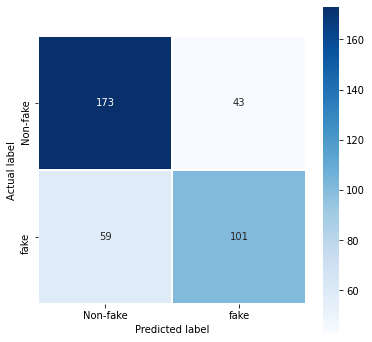

In [ ]:
cm = metrics.confusion_matrix(fake_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-fake', 'fake']
yticklabels = ['Non-fake', 'fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]


a = f1_score(y_true, y_pred, average='weighted')
print(a)

print(classification_report(y_true,y_pred))

0.26666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6



##Random Forest Classifier

In [ ]:
#Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
fake_clf = RandomForestClassifier(n_estimators=400).fit(fake_x_train, fake_y_train)

In [ ]:
#Dumping the Random Forest Model
# joblib.dump(fake_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/rf_fake_clf.pkl")
fake_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/rf_fake_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = fake_clf.predict(fake_x_test)
print(classification_report(fake_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=fake_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75       216
         1.0       0.69      0.44      0.53       160

    accuracy                           0.68       376
   macro avg       0.68      0.64      0.64       376
weighted avg       0.68      0.68      0.66       376

(array([0., 1.]), array([274, 102]))
[0.75102041 0.53435115]


Text(0.5, 62.15999999999998, 'Predicted label')

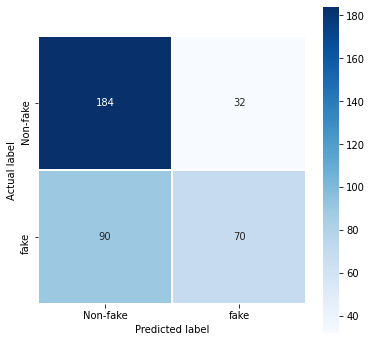

In [ ]:
cm = metrics.confusion_matrix(fake_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-fake', 'fake']
yticklabels = ['Non-fake', 'fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

### 768 --> 30 --> 10 --> 2

fake_clf= MLPClassifier(hidden_layer_sizes = (30,10),activation='relu',max_iter=10000,learning_rate_init=0.001)
fake_clf.fit(fake_x_train,fake_y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# learning_rates = [0.001, 0.005, 0.05, 0.1, 0.5, 1, 2, 5, 10]

# for lr in learning_rates:
#     fake_clf= MLPClassifier(hidden_layer_sizes = (30,10),activation='relu',max_iter=10000)
#     fake_clf.fit(fake_x_train,fake_y_train)
    
#     print("Training set score: %f" % fake_clf.score(fake_x_train, fake_y_train))
#     print("Test set score: %f" % fake_clf.score(fake_x_test, fake_y_test))

Training set score: 0.997013
Test set score: 0.755319
Training set score: 0.996639
Test set score: 0.744681
Training set score: 0.997013
Test set score: 0.747340
Training set score: 0.996639
Test set score: 0.742021
Training set score: 0.991785
Test set score: 0.734043
Training set score: 0.997013
Test set score: 0.744681
Training set score: 0.997013
Test set score: 0.765957
Training set score: 0.997013
Test set score: 0.728723
Training set score: 0.996639
Test set score: 0.728723


In [ ]:
#Dumping the Random Forest Model
# joblib.dump(fake_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/mlp_fake_clf.pkl")
fake_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/mlp_fake_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = fake_clf.predict(fake_x_test)
print(classification_report(fake_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=fake_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       216
         1.0       0.66      0.66      0.66       160

    accuracy                           0.71       376
   macro avg       0.71      0.71      0.71       376
weighted avg       0.71      0.71      0.71       376

(array([0., 1.]), array([218, 158]))
[0.75115207 0.66037736]


Text(0.5, 62.15999999999998, 'Predicted label')

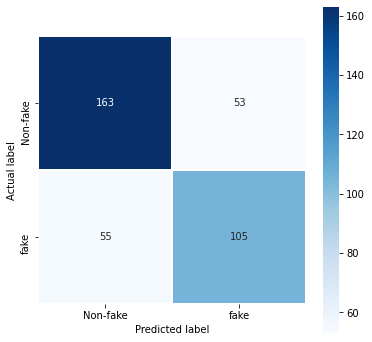

In [ ]:
cm = metrics.confusion_matrix(fake_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-fake', 'fake']
yticklabels = ['Non-fake', 'fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
fake_clf = 0
fake_clf = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000,class_weight='balanced').fit(fake_x_train, fake_y_train)

In [ ]:
#Dumping the Random Forest Model
# joblib.dump(fake_clf,r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/lr_fake_clf.pkl")
fake_clf = joblib.load(r"/gdrive/My Drive/3rd Sem/MTech CSE 3/Thesis/IIITD Fake News Project/Notebooks/Models/Fine Grained Models/lr_fake_clf.pkl")

In [ ]:
print("\n\nAccuracy report: ")
predict_test = fake_clf.predict(fake_x_test)
print(classification_report(fake_y_test,predict_test))
print(np.unique(predict_test,return_counts = True))
f1 = f1_score(y_true=fake_y_test, y_pred=predict_test, average=None)
print(f1)



Accuracy report: 
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       216
         1.0       0.69      0.67      0.68       160

    accuracy                           0.73       376
   macro avg       0.73      0.73      0.73       376
weighted avg       0.73      0.73      0.73       376

(array([0., 1.]), array([222, 154]))
[0.7716895  0.68152866]


Text(0.5, 62.15999999999998, 'Predicted label')

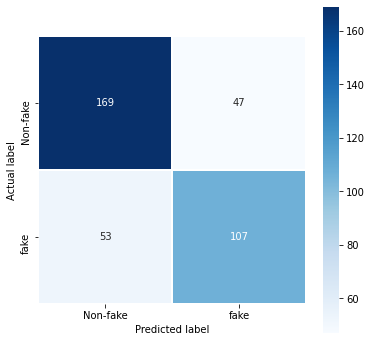

In [ ]:
cm = metrics.confusion_matrix(fake_y_test, predict_test)
plt.figure(figsize=(6,6))
xticklabels = ['Non-fake', 'fake']
yticklabels = ['Non-fake', 'fake']
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues',xticklabels=xticklabels, yticklabels=yticklabels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')